In [1]:
import numpy as np 
import pandas as pd

In [2]:
movies= pd.read_csv("movies.csv")

In [3]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
movies.duplicated().sum()

0

In [6]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
print('The total number of movies in the dataset : {}'.format(len(movies['movieId'].unique())))

The total number of movies in the dataset : 9742


In [8]:
print('The total number of unique movies(title) in the dataset : {}'.format(len(movies['title'].unique())))

The total number of unique movies(title) in the dataset : 9737


In [9]:
print('The total number of dublicate movies in the dataset : {}'.format(len(movies[movies.duplicated(subset = 'title', keep = 'first')])))
df_tmp=movies[movies.duplicated(subset = 'title', keep = False)]
df_tmp.head()

The total number of dublicate movies in the dataset : 5


,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama


In [10]:
movies.drop_duplicates(subset='title', inplace = True, keep= 'first')

In [11]:
movies[movies.duplicated(subset = 'title', keep = False)]

,movieId,title,genres


In [12]:
rating=pd.read_csv('ratings.csv')

In [13]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
rating.shape

(100836, 4)

In [15]:
rating.duplicated().sum()

0

In [16]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
data = rating.merge(movies,on='movieId', how='left')

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

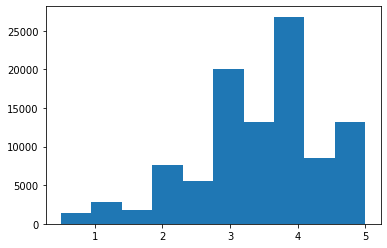

In [18]:
import matplotlib.pyplot as plt
plt.hist(data['rating'])

In [19]:
print('The number of movies which are rated by users : {}'.format(len(rating['movieId'].unique())))

The number of movies which are rated by users : 9724


In [20]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [21]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        6
genres       6
dtype: int64

In [22]:
print('Max rating : {}  Min rating : {}'.format(data['rating'].max(), data['rating'].min()))

Max rating : 5.0  Min rating : 0.5


In [23]:
data['Year']=data['title'].str.extract('.*\((.*)\).*')

In [24]:
data.head()

,userId,movieId,rating,timestamp,title,genres,Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [25]:
data['Year'].replace(['Das Millionenspiel','Bicicleta, cullera, poma','2007-','2009– ', '1975-1979', '1983)','2006–2007','Close Relations','Your Past Is Showing'], value=[np.nan, np.nan, '2007', '2009', '1975', '1983','2007',np.nan,np.nan], inplace=True)

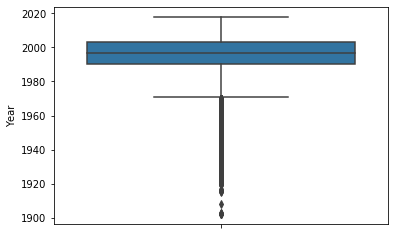

In [26]:
import seaborn as sns
sns.boxplot(data['Year'].dropna().astype('int64'), orient='v')

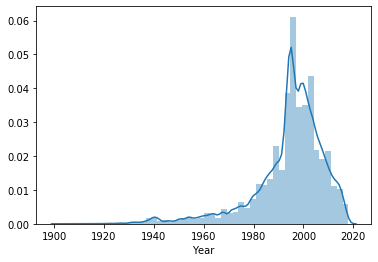

In [27]:
sns.distplot(data['Year'].dropna().astype('int64'))

In [28]:
data[['genres']].nunique()

genres    951
dtype: int64

In [29]:
cnt=data['genres'].value_counts()

In [30]:
cnt

Comedy                                            7196
Drama                                             6291
Comedy|Romance                                    3967
Comedy|Drama|Romance                              3000
Comedy|Drama                                      2851
                                                  ... 
Comedy|Musical|Sci-Fi|Western                        1
Action|Animation|Comedy|Horror|Thriller              1
Action|Adventure|Comedy|Crime|Romance|Thriller       1
Animation|Children|Comedy|Drama                      1
Action|Adventure|Animation|Horror                    1
Name: genres, Length: 951, dtype: int64

In [31]:
data.groupby('genres').count()

,userId,movieId,rating,timestamp,title,Year
genres,,,,,,
(no genres listed),47,47,47,47,47,38
Action,186,186,186,186,186,186
Action|Adventure,555,555,555,555,555,555
Action|Adventure|Animation,42,42,42,42,42,42
Action|Adventure|Animation|Children,39,39,39,39,39,39
...,...,...,...,...,...,...
Sci-Fi|Thriller,115,115,115,115,115,115
Sci-Fi|Thriller|IMAX,12,12,12,12,12,12
Thriller,628,628,628,628,628,628


In [32]:
grp=pd.DataFrame()
grp=data.groupby(['genres', 'title']).agg({'genres': ['count']})

In [33]:
data.head()

,userId,movieId,rating,timestamp,title,genres,Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [34]:
data["genres"]=data["genres"].str.split("|")

In [35]:
#creating list with unique genres
genres = list(set('|'.join(list(movies["genres"].unique())).split('|')))
genres.remove('(no genres listed)')

#Creating dummy columns for each genre
for genre in genres:
    movies[genre] = movies['genres'].map(lambda val: 1 if genre in val else 0)

In [36]:
#Droping genres
rating.drop('timestamp', axis=1,inplace= True) 

In [37]:
df = pd.merge(rating, movies, on='movieId')
print(df.shape)

(100830, 24)


In [38]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2)

# Item-based collaborative recommender

In [39]:
def item_based_recom(input_dataframe,input_film_name):    
    pivot_item_based = pd.pivot_table(input_dataframe,
                                      index='title',
                                      columns=['userId'], values='rating')  
    sparse_pivot = sparse.csr_matrix(pivot_item_based.fillna(0))
    recommender = pw.cosine_similarity(sparse_pivot)
    recommender_df = pd.DataFrame(recommender, 
                                  columns=pivot_item_based.index,
                                  index=pivot_item_based.index)
    ## Item Rating Based Cosine Similarity
    cosine_df = pd.DataFrame(recommender_df[film_name].sort_values(ascending=False))
    cosine_df.reset_index(level=0, inplace=True)
    cosine_df.columns = ['title','cosine_sim']
    return cosine_df

# Item and Genre-based recommender

In [40]:
def item_and_genre_based_recom(cosine_df,movies_df,categories):    
## Item Rating and Gender Based Cosine Similarity
    top_cos_genre = pd.merge(cosine_df, movies, on='title')
    # Creating column with genre cosine similarity
    top_cos_genre['genre_similarity'] = [pairwise_row_diff(top_cos_genre,0,row,categories) 
                                          for row in top_cos_genre.index.values]
    return top_cos_genre[['title','cosine_sim','genre_similarity']]

def pairwise_row_diff(dataframe,row1, row2,column_names):
#     display(dataframe)
     # Creates 2 Matrix to compare cosine similarity
    matrix_row1 = [[dataframe.loc[row1,cat] for cat in column_names]] 
    matrix_row2 = [[dataframe.loc[row2,cat] for cat in column_names]] 
    return round(pw.cosine_similarity(matrix_row1,matrix_row2)[0][0],5)

In [41]:
categories = ['Film-Noir', 'Adventure', 'Children',
           'IMAX', 'Crime', 'Documentary', 'Fantasy', 'Musical', 'Romance',
           'Mystery', 'Thriller', 'Animation', 'Action', 'Comedy', 'War', 'Drama',
           'Western', 'Sci-Fi', 'Horror']

# film_name = 'Inception (2010)' 
film_name ='Iron Man 2 (2010)' 
user_id = 611

In [42]:
import sklearn.metrics.pairwise as pw
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [43]:
def generate_recomendations(train_data,film_name,input_films_rated,top_results=5,cat=categories):
    print("User name: " + "Favorite Movie:", film_name+'\n\n')
    print("Films you might enjooy based that you watched", film_name)
    ## Item Rating Based Cosine Similarity
    cos_sim = item_based_recom(train_data,film_name)
    display(cos_sim[1:top_results+1])
    
    print("***********************************************************************************************\n")
    print("Films you might enjooy with similar genre then", film_name) 
    display(item_and_genre_based_recom(item_based_recom(train_data,film_name),movies,categories)\
            .sort_values('cosine_sim',ascending=False)[top_results:]\
            .sort_values('genre_similarity',ascending=False)[:top_results])
    return None
    
generate_recomendations(train_data,film_name,5)

User name: Favorite Movie: Iron Man 2 (2010)


Films you might enjooy based that you watched Iron Man 2 (2010)


,title,cosine_sim
1,"Avengers, The (2012)",0.600303
2,Guardians of the Galaxy (2014),0.579224
3,Iron Man (2008),0.551023
4,Ant-Man (2015),0.531113
5,Iron Man 3 (2013),0.517706


***********************************************************************************************

Films you might enjooy with similar genre then Iron Man 2 (2010)


,title,cosine_sim,genre_similarity
2119,G.I. Joe: Retaliation (2013),0.156603,1.00000
48,"Matrix Reloaded, The (2003)",0.396605,1.00000
125,"Matrix Revolutions, The (2003)",0.343171,1.00000
18,Spider-Man 3 (2007),0.442056,1.00000
332,Death Race (2008),0.281973,0.89443


In [44]:
def generate_recomendations(test_data,film_name,input_films_rated,top_results=5,cat=categories):
    print("User name: " + "Favorite Movie:", film_name+'\n\n')
    print("Films you might enjooy based that you watched", film_name)
    ## Item Rating Based Cosine Similarity
    cos_sim = item_based_recom(test_data,film_name)
    display(cos_sim[1:top_results+1])
    
    print("***********************************************************************************************\n")
    print("Films you might enjooy with similar genre then", film_name) 
    display(item_and_genre_based_recom(item_based_recom(test_data,film_name),movies,categories)\
            .sort_values('cosine_sim',ascending=False)[top_results:]\
            .sort_values('genre_similarity',ascending=False)[:top_results])
    return None
    
generate_recomendations(test_data,film_name,5)

User name: Favorite Movie: Iron Man 2 (2010)


Films you might enjooy based that you watched Iron Man 2 (2010)


,title,cosine_sim
1,Valerian and the City of a Thousand Planets (2...,0.554339
2,Stuart Little 2 (2002),0.535441
3,Monsters University (2013),0.534878
4,Life of Pi (2012),0.514947
5,Kung Fu Panda 3 (2016),0.478913


***********************************************************************************************

Films you might enjooy with similar genre then Iron Man 2 (2010)


,title,cosine_sim,genre_similarity
1461,G.I. Joe: Retaliation (2013),0.000000,1.00000
3000,Spider-Man 3 (2007),0.000000,1.00000
4157,"Matrix Reloaded, The (2003)",0.000000,1.00000
4174,"Matrix Revolutions, The (2003)",0.000000,1.00000
625,Terminator Salvation (2009),0.083509,0.89443
